In [1]:
# Change the working directory to the parent directory so imports and everything else works
import os
os.chdir("..")

## Trajectory
Visualize trajectories from the pose files. Same implementation (with small modifications) as the function from the `debug.ipynb` from our MonoRec repository.

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_trajectory(x, y, z, orientations, every_nth=50):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot trajectory
    ax.plot(x, y, z, 'k-', label='Trajectory', linewidth=2.0)

    # Set maximum and minimum values for all axes to be the maximum absolute
    # value
    x_abs = [abs(num) for num in x]
    y_abs = [abs(num) for num in y]
    z_abs = [abs(num) for num in z]

    max_value = max(max(x_abs), max(y_abs), max(z_abs))
    min_value = -max_value

    ax.set_xlim([min_value, max_value])
    ax.set_ylim([min_value, max_value])
    ax.set_zlim([min_value, max_value])

    # Scale factor for the coordinate frame axes
    coordinate_scale = max_value * 0.1

    # Plot camera orientations
    for i in range(len(x)):
        R = orientations[i]
        origin = np.array([x[i], y[i], z[i]])
        x_axis = R @ (coordinate_scale * np.array([1,0,0]).reshape(3,1))
        y_axis = R @ (coordinate_scale * np.array([0,1,0]).reshape(3,1))
        z_axis = R @ (coordinate_scale * np.array([0,0,1]).reshape(3,1))

        if i == 0:
            # Plot the camera center and the labels for camera axes
            ax.scatter(x[i], y[i], z[i], color='k')
            ax.quiver(origin[0], origin[1], origin[2], x_axis[0], x_axis[1], x_axis[2], color='r', label='Camera X-axis', arrow_length_ratio=0.1)
            ax.quiver(origin[0], origin[1], origin[2], y_axis[0], y_axis[1], y_axis[2], color='g', label='Camera Y-axis', arrow_length_ratio=0.1)
            ax.quiver(origin[0], origin[1], origin[2], z_axis[0], z_axis[1], z_axis[2], color='b', label='Camera Z-axis', arrow_length_ratio=0.1)
        elif i % every_nth == 0:
            # Plot the camera center
            ax.scatter(x[i], y[i], z[i], color='k')
            ax.quiver(origin[0], origin[1], origin[2], x_axis[0], x_axis[1], x_axis[2], color='r', arrow_length_ratio=0.1)
            ax.quiver(origin[0], origin[1], origin[2], y_axis[0], y_axis[1], y_axis[2], color='g', arrow_length_ratio=0.1)
            ax.quiver(origin[0], origin[1], origin[2], z_axis[0], z_axis[1], z_axis[2], color='b', arrow_length_ratio=0.1)


    # Axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y (up/down)')
    ax.set_zlabel('Z (forward)')

    ax.legend()

    plt.show()

In [3]:
from mono.utils.trajectory import read_kitti_trajectory
# trajectory_path = "/usr/stud/kaa/thesis/MonoRec/example/data/kitti/poses/07.txt"
trajectory_path = "/usr/stud/kaa/thesis/data_temp/deep_scenario/poses_dvso/01.txt"

trajectories, paths = read_kitti_trajectory(trajectory_path) # returns a list of [4,4] np.ndarrays

x = []
y = []
z = []
R = []


for element in trajectories:
    # Currently read-in coordinates x,y,z and rotation matrix R_w_cam0
    x_curr, y_curr, z_curr = element[:3, 3]
    R_curr = element[:3,:3]

    x.append(x_curr)
    y.append(y_curr)
    z.append(z_curr)
    R.append(R_curr)

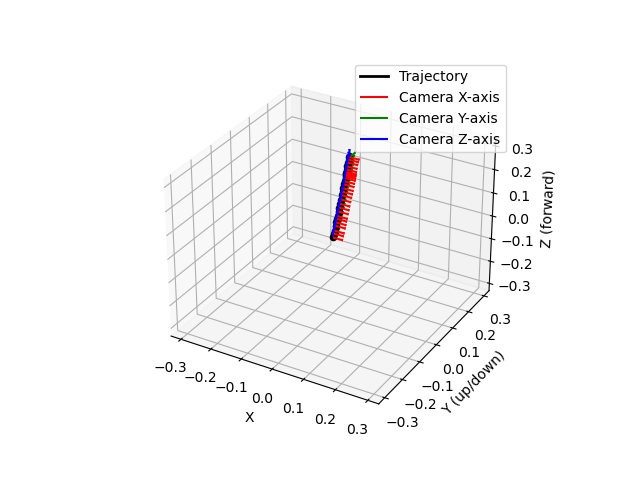

In [6]:
FANCY_PLOT = True

if FANCY_PLOT:
    visualize_trajectory(x,y,z,R, every_nth=10)
else:
    # Create a new figure and add a 3D subplot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the trajectory
    ax.plot(x, y, z)

    # Set maximum and minimum values for all axes to be the maximum absolute
    # value
    x_abs = [abs(num) for num in x]
    y_abs = [abs(num) for num in y]
    z_abs = [abs(num) for num in z]

    max_value = max(max(x_abs), max(y_abs), max(z_abs))
    min_value = -max_value

    ax.set_xlim([min_value, max_value])
    ax.set_ylim([min_value, max_value])
    ax.set_zlim([min_value, max_value])

    # Display the plot
    plt.show()

In [10]:
for i in range(len(x[:150])):
    print(f"x: {x[i]}, y: {y[i]}, z: {z[i]}")



x: 0.000822303, y: 0.002241754, z: 0.011614536
x: 0.001276278, y: 0.003402896, z: 0.017337658
x: 0.006056496, y: 0.018472938, z: 0.097632863
x: 0.002046732, y: 0.005653317, z: 0.028578104
x: 0.004126249, y: 0.009509031, z: 0.052155003
x: 0.002861263, y: 0.007885283, z: 0.039811905
x: 0.003439471, y: 0.009078421, z: 0.045499116
x: 0.003671347, y: 0.01016053, z: 0.050991591
x: 0.004155495, y: 0.01127593, z: 0.056588393
x: 0.004482199, y: 0.012455002, z: 0.062120371
x: 0.004891957, y: 0.013573848, z: 0.067723699
x: 0.005368179, y: 0.014662787, z: 0.073202476
x: 0.0057776, y: 0.015746338, z: 0.078743368
x: 0.006215962, y: 0.016766286, z: 0.084205024
x: 0.007991438, y: 0.020324199, z: 0.103818297
x: 0.007013218, y: 0.01896595, z: 0.095209479
x: 0.009104658, y: 0.022571059, z: 0.114877924
x: 0.007799173, y: 0.021043545, z: 0.105972178
x: 0.009072919, y: 0.024705028, z: 0.125670761
x: 0.008539914, y: 0.023179408, z: 0.116744436
x: 0.009951132, y: 0.027400853, z: 0.135949329
x: 0.009366292, y:

In [11]:
for i in range(len(R[:150])):
    print(R[i])
    print("===============")


[[ 1.0000e+00 -6.1090e-05  7.9443e-05]
 [ 6.1097e-05  1.0000e+00 -9.5694e-05]
 [-7.9437e-05  9.5699e-05  1.0000e+00]]
[[ 1.00000e+00 -8.49670e-05  1.07753e-04]
 [ 8.49880e-05  1.00000e+00 -1.93090e-04]
 [-1.07737e-04  1.93099e-04  1.00000e+00]]
[[ 9.99999821e-01 -2.28921000e-04  5.78252000e-04]
 [ 2.28647000e-04  9.99999881e-01  4.73074000e-04]
 [-5.78360000e-04 -4.72942000e-04  9.99999702e-01]]
[[ 9.9999994e-01 -1.7859100e-04  2.9612400e-04]
 [ 1.7866200e-04  9.9999994e-01 -2.3968900e-04]
 [-2.9608100e-04  2.3974200e-04  9.9999994e-01]]
[[ 9.99999762e-01 -6.14175000e-04  2.34420000e-04]
 [ 6.13992000e-04  9.99999523e-01  7.79837000e-04]
 [-2.34899000e-04 -7.79693000e-04  9.99999642e-01]]
[[ 9.99999881e-01 -3.60650000e-05  5.04902000e-04]
 [ 3.61610000e-05  1.00000000e+00 -1.90069000e-04]
 [-5.04896000e-04  1.90088000e-04  9.99999881e-01]]
[[ 9.9999994e-01 -3.7267000e-05  2.4201100e-04]
 [ 3.7350000e-05  9.9999994e-01 -3.3959200e-04]
 [-2.4199900e-04  3.3960100e-04  9.9999994e-01]]
[[ 

## Scale Alignment Debug
Please see the script `get_depth_prediction.py` in the root of this project.